In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [3]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

### Discrete distributions

#### Bernoulli distribution

The PDF of the Bernoulli distribution is given by

$$
f(x) = p^x (1-p)^{1-x}
$$

where $x \in \{0, 1\}$ and $p \in [0, 1]$.


In [12]:
bernoulli = torch.distributions.Bernoulli(probs=0.3)
bernoulli.probs

tensor(0.3000)

([<matplotlib.axis.XTick at 0x7fbff31ddbb0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

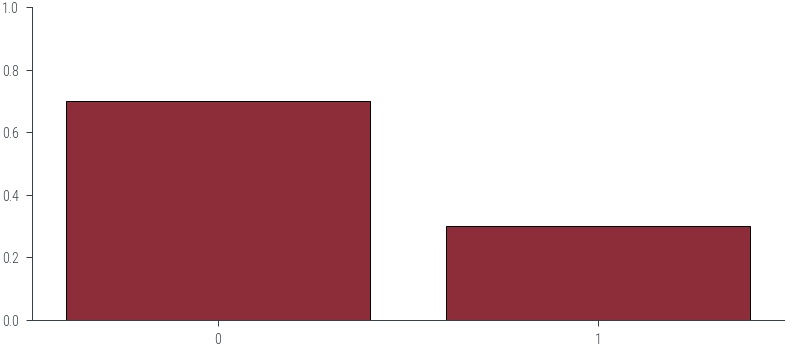

In [6]:
# Plot PDF
p_1 = bernoulli.probs.item()
p_0 = 1 - p_1

plt.bar([0, 1], [p_0, p_1], color='C0', edgecolor='k')
plt.ylim(0, 1)
plt.xticks([0, 1], ['0', '1'])

In [8]:
### Careful!
bernoulli = torch.distributions.Bernoulli(logits=-20.0)
bernoulli.probs

tensor(2.0612e-09)

Logits?!

Probs range from 0 to 1, logits range from -inf to inf. Logits are the inverse of the sigmoid function.

The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

The inverse of the sigmoid function is defined as:

$$\sigma^{-1}(x) = \log \frac{x}{1 - x}$$




In [10]:
### Sampling
bernoulli.sample()

tensor(0.)

In [17]:
bernoulli.sample((2,))

tensor([0., 0.])

In [20]:
data = bernoulli.sample((1000,))
data

tensor([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 

In [21]:
### Count number of 1s
data.sum()

tensor(302.)

In [11]:
### IID sampling
size = 1000
data = torch.empty(size)
for s_num in range(size):
    dist = torch.distributions.Bernoulli(probs=0.3) # Each sample uses the same distribution (Identical)
    data[s_num] = dist.sample() # Each sample is independent (Independent)

In [12]:
### Dependent sampling
size = 1000

### If previous sample was 1, next sample is 1 with probability 0.9
### If previous sample was 1, next sample is 0 with probability 0.1
### If previous sample was 0, next sample is 0 with probability 0.8
### If previous sample was 0, next sample is 1 with probability 0.2

In [13]:
### Categorical distribution

p1 = 0.2
p2 = 0.3
p3 = 0.5

categorical = torch.distributions.Categorical(probs=torch.tensor([p1, p2, p3]))
categorical.probs

tensor([0.2000, 0.3000, 0.5000])

([<matplotlib.axis.XTick at 0x7f4c5c094ac0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

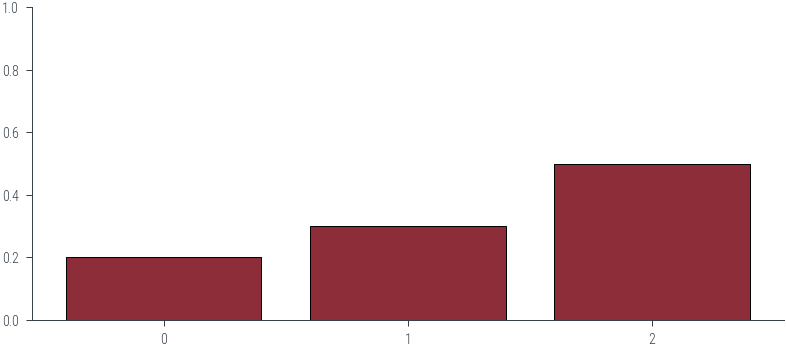

In [14]:
# Plot PDF

plt.bar([0, 1, 2], [p1, p2, p3], color='C0', edgecolor='k')
plt.ylim(0, 1)
plt.xticks([0, 1, 2], ['0', '1', '2'])

In [15]:
### Uniform distribution

uniform = torch.distributions.Uniform(low=0, high=1)

In [16]:
uniform.sample()

tensor(0.0553)

In [17]:
uniform.support

Interval(lower_bound=0.0, upper_bound=1.0)

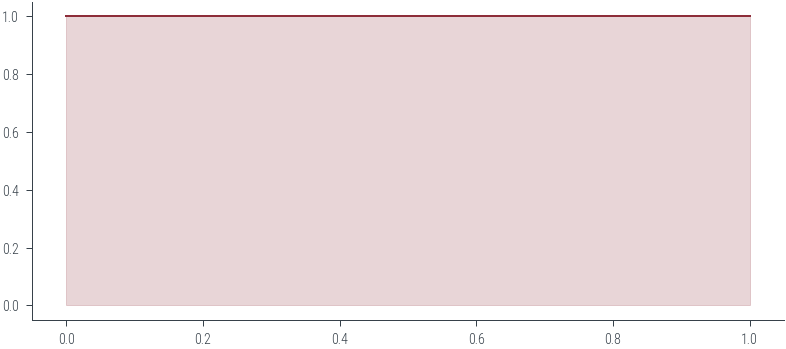

In [18]:
### Plot PDF
xs = torch.linspace(0.0, 0.99999, 500)
ys = uniform.log_prob(xs).exp()

plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)


In [19]:
### Why log_prob? and not prob?

In [4]:
### Normal distribution

normal = torch.distributions.Normal(loc=0, scale=1)


In [5]:
normal.support

Real()

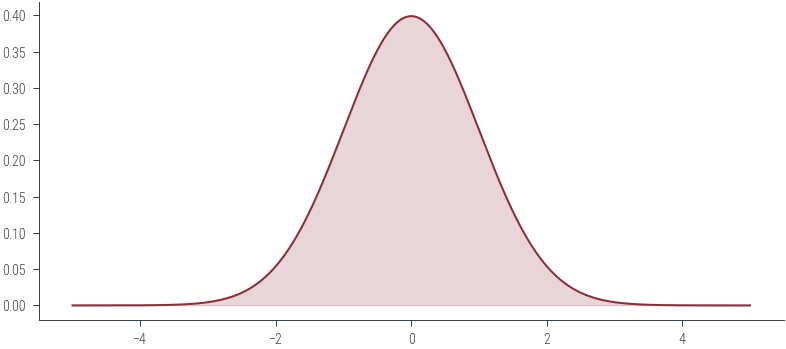

In [6]:
### Plot PDF
xs = torch.linspace(-5, 5, 500)
ys = normal.log_prob(xs).exp()
plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)

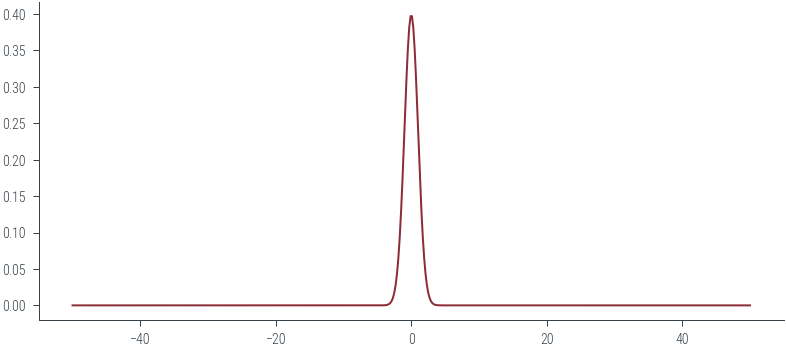

In [7]:
xs = torch.linspace(-50, 50, 500)
probs = normal.log_prob(xs).exp()
plt.plot(xs, probs, color='C0')
# Filled area
#plt.fill_between(xs, probs, color='C0', alpha=0.2)

In [10]:
normal.log_prob(torch.tensor(-20)), normal.log_prob(torch.tensor(-40))

normal.log_prob(torch.tensor(-20)).exp(), normal.log_prob(torch.tensor(-40)).exp()

(tensor(0.), tensor(0.))

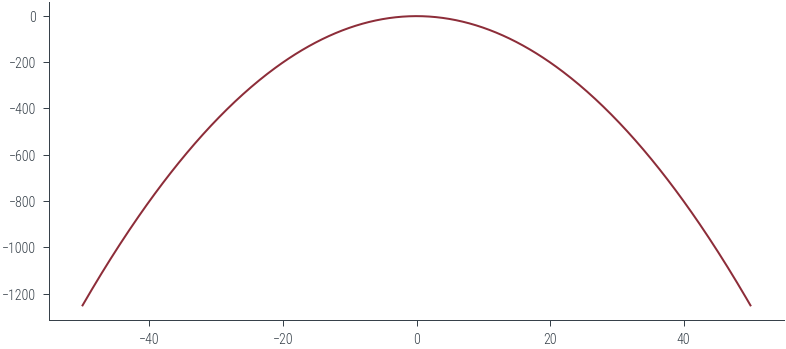

In [28]:
xs = torch.linspace(-50, 50, 500)
logprobs = normal.log_prob(xs)
plt.plot(xs, logprobs, color='C0')


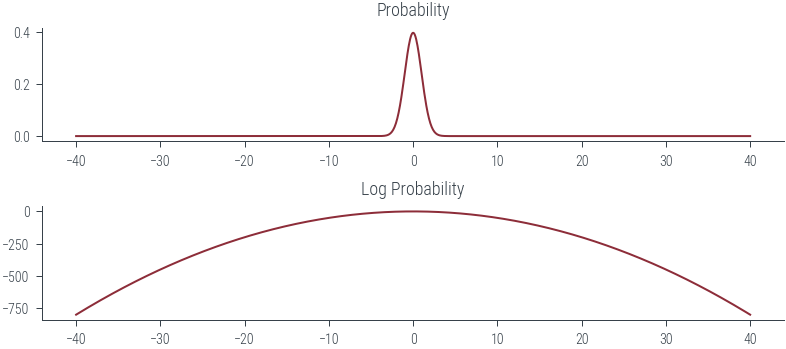

In [11]:
def plot_normal(mu, sigma):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)
    xs = torch.linspace(-40, 40, 1000)
    dist = torch.distributions.Normal(mu, sigma)
    
    logprobs = dist.log_prob(xs)
    probs = torch.exp(logprobs)
    fig, ax = plt.subplots(nrows=2)
    ax[0].plot(xs, probs)
    ax[0].set_title("Probability")
    ax[1].plot(xs, logprobs)
    ax[1].set_title("Log Probability")


plot_normal(0, 1)


In [12]:
# Interactive slider for plot_normal function

from ipywidgets import interact, FloatSlider

interact(plot_normal, mu=FloatSlider(min=-2, max=2, step=0.1, value=0), sigma=FloatSlider(min=0.1, max=2, step=0.1, value=1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.plot_normal(mu, sigma)>

In [13]:
samples = normal.sample((1000,))
samples[:20]

tensor([ 1.8764,  0.4868, -0.7966, -0.8190,  1.4538,  0.0766, -2.0262,  0.9965,
        -1.1971, -0.4764, -2.1042,  0.2489, -0.2859,  1.1970, -0.7265, -0.8898,
        -0.4592, -0.3581, -0.7239, -0.0790])

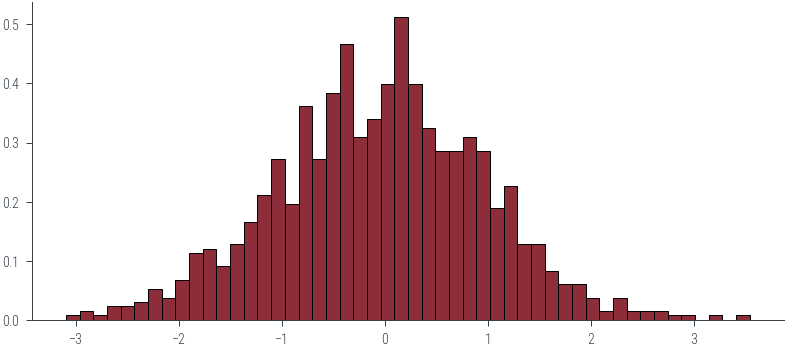

In [14]:
_ = plt.hist(samples.numpy(), bins=50, density=True, edgecolor='k')

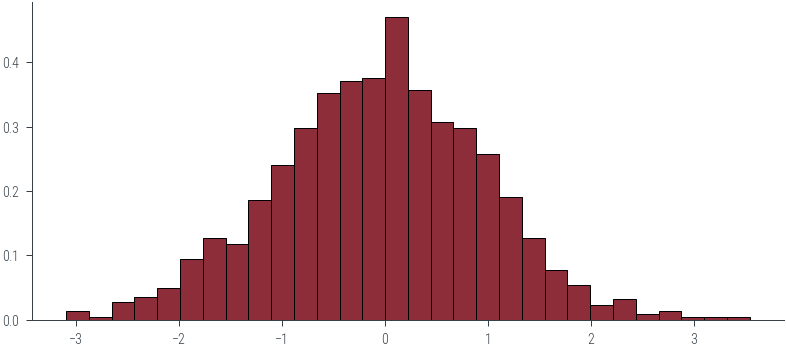

In [15]:
_ = plt.hist(samples.numpy(), bins=30, density=True, edgecolor='k')

<AxesSubplot:ylabel='Density'>

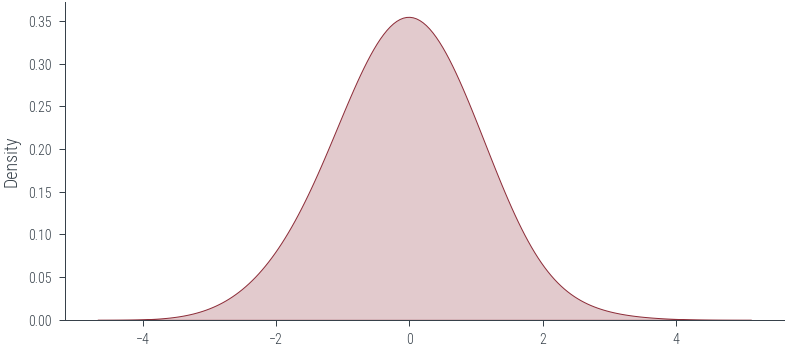

In [21]:
import seaborn as sns
sns.kdeplot(samples.numpy(), bw_adjust=2.1, shade=True)

Text(0.5, 1.0, 'IID samples')

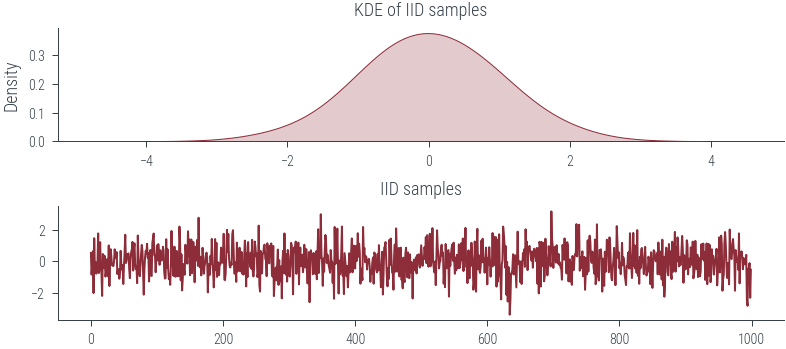

In [22]:
### IID sampling

n_samples = 1000
samples = []
for i in range(n_samples):
    dist = torch.distributions.Normal(0, 1) # Using identical distribution over all samples
    samples.append(dist.sample()) # sample is independent of previous samples

samples = torch.stack(samples)

fig, ax = plt.subplots(nrows=2)
sns.kdeplot(samples.numpy(), bw_adjust=2.0, shade=True, ax=ax[0])
ax[0].set_title("KDE of IID samples")

ax[1].plot(samples.numpy())
ax[1].set_title("IID samples")

Text(0.5, 1.0, 'Samples over time')

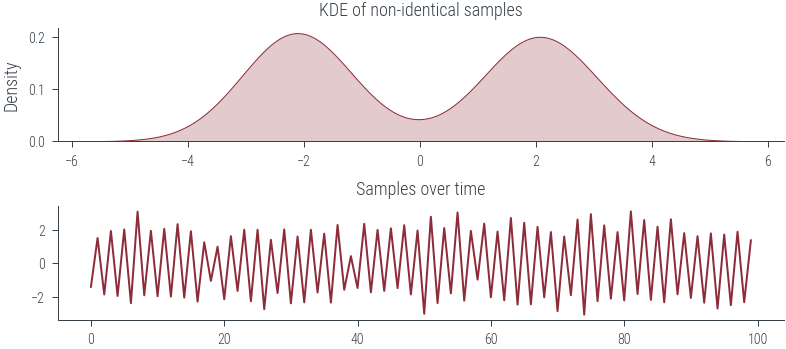

In [23]:
### Non-IID sampling (non-identical distribution)

n_samples = 100
samples = []
for i in range(n_samples):
    # Non-indentical distribution
    if i%2:
        dist = torch.distributions.Normal(torch.tensor([2.0]), torch.tensor([0.5]))
    else:
        dist = torch.distributions.Normal(torch.tensor([-2.0]), torch.tensor([0.5]))
    samples.append(dist.sample())

samples = torch.stack(samples)

fig, ax = plt.subplots(nrows=2)
sns.kdeplot(samples.numpy().flatten(), bw_adjust=1.0, shade=True, ax=ax[0])
ax[0].set_title("KDE of non-identical samples")

ax[1].plot(samples.numpy().flatten())
ax[1].set_title("Samples over time")

Text(0.5, 1.0, 'IID samples')

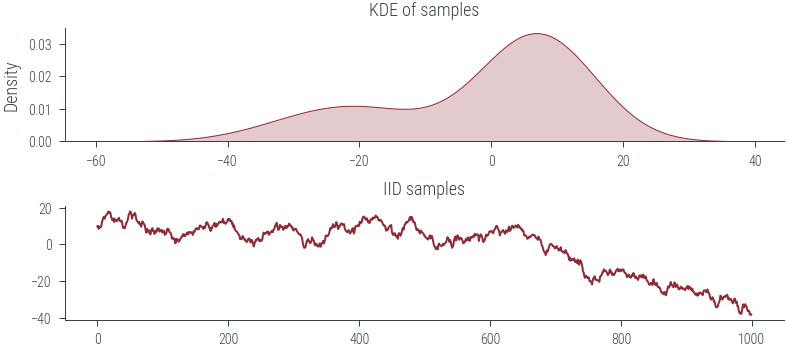

In [26]:
### Non-IID sampling (dependent sampling)

n_samples = 1000
prev_sample = torch.tensor([10.0])
samples = []
for i in range(n_samples):
    dist = torch.distributions.Normal(prev_sample, 1)
    sample = dist.sample()
    samples.append(sample)
    prev_sample = sample

samples = torch.stack(samples)
fig, ax = plt.subplots(nrows=2)
sns.kdeplot(samples.numpy().flatten(), bw_adjust=2.0, shade=True, ax=ax[0])
ax[0].set_title("KDE of samples")

ax[1].plot(samples.numpy().flatten())
ax[1].set_title("IID samples")    

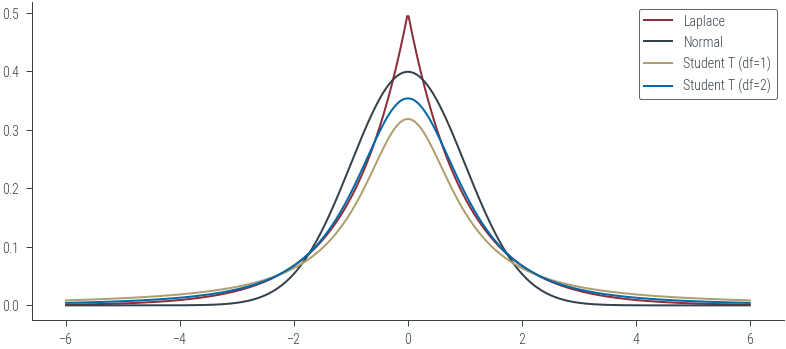

In [41]:
### Laplace distribution v/s Normal distribution

laplace = torch.distributions.Laplace(loc=0, scale=1)
normal = torch.distributions.Normal(loc=0, scale=1)
student_t_1 = torch.distributions.StudentT(df=1)
student_t_2 = torch.distributions.StudentT(df=2)


xs = torch.linspace(-6, 6, 500)
ys_laplace = laplace.log_prob(xs).exp()
plt.plot(xs, ys_laplace, color='C0', label='Laplace')

ys_normal = normal.log_prob(xs).exp()
plt.plot(xs, ys_normal, color='C1', label='Normal')

ys_student_t_1 = student_t_1.log_prob(xs).exp()
plt.plot(xs, ys_student_t_1, color='C2', label='Student T (df=1)')

ys_student_t_2 = student_t_2.log_prob(xs).exp()
plt.plot(xs, ys_student_t_2, color='C3', label='Student T (df=2)')

plt.legend()

zoom  = False
if zoom:
    plt.xlim(5, 6)
    plt.ylim(-0.002, 0.02)

In [54]:
### Beta distribution

beta = torch.distributions.Beta(concentration1=2, concentration0=2)
beta.support

Interval(lower_bound=0.0, upper_bound=1.0)

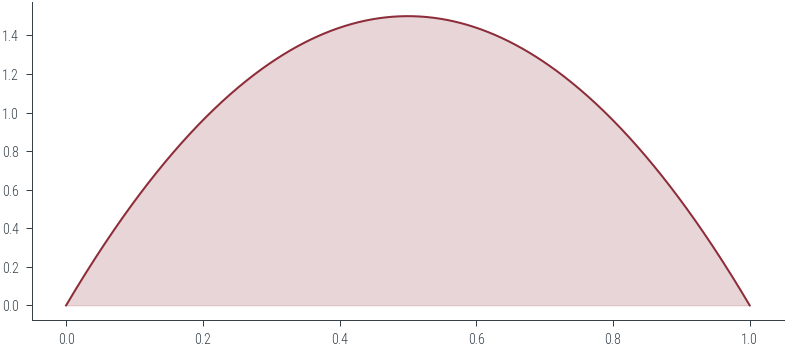

In [56]:
# PDF
xs = torch.linspace(0, 1, 500)
ys = beta.log_prob(xs).exp()
plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)

In [66]:
s = beta.sample()
s

tensor(0.3356)

In [62]:
# Add widget to play with parameters
from ipywidgets import interact

def plot_beta(a, b):
    beta = torch.distributions.Beta(concentration1=a, concentration0=b)
    xs = torch.linspace(0, 1, 500)
    ys = beta.log_prob(xs).exp()
    plt.plot(xs, ys, color='C0')
    # Filled area
    plt.fill_between(xs, ys, color='C0', alpha=0.2)

interact(plot_beta,a=(0.1, 10, 0.1), b=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=0.1), FloatSlider(value=5.0, descr…

<function __main__.plot_beta(a, b)>

In [63]:
### Dirichlet distribution

dirichlet = torch.distributions.Dirichlet(concentration=torch.tensor([2.0, 2.0, 2.0]))
dirichlet.support

Simplex()

In [65]:
s = dirichlet.sample()
print(s, s.sum())

tensor([0.2924, 0.3254, 0.3821]) tensor(1.)


In [67]:
s = dirichlet.sample()
print(s, s.sum())

tensor([0.3898, 0.1071, 0.5030]) tensor(1.)


In [68]:
dirichlet2 = torch.distributions.Dirichlet(concentration=torch.tensor([0.8, 0.1, 0.1]))
s = dirichlet2.sample()
print(s, s.sum())

tensor([0.8190, 0.0111, 0.1699]) tensor(1.)
